<a href="https://colab.research.google.com/github/arafatro/Machine-Learning/blob/master/KNN_Lazy/KNN_LazyLearner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-nearest neighbors (KNN)
KNN is a simple, supervised machine learning (ML) algorithm that can be used for classification or regression tasks - and is also frequently used in missing value imputation. It is based on the idea that the observations closest to a given data point are the most "similar" observations in a data set, and we can therefore classify unforeseen points based on the values of the closest existing points. By choosing K, the user can select the number of nearby observations to use in the algorithm.


In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [15]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the KNN classifier
# Note: KNN is a lazy learner because it stores the training data and performs no model training.
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model with training data (KNN simply stores the data)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of KNN classifier:", accuracy)

Accuracy of KNN classifier: 1.0


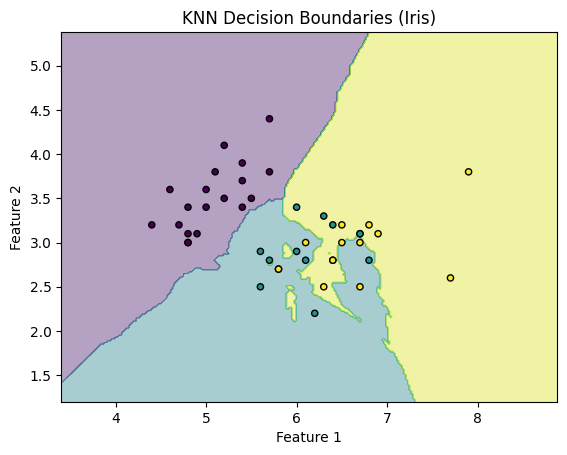

In [16]:
# Visualize decision boundaries (for two features only, for demonstration)
# Selecting the first two features for easy visualization
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# For visualization, we use only the first two features
plot_decision_boundaries(X_test[:, :2], y_test, KNeighborsClassifier(n_neighbors=5).fit(X_train[:, :2], y_train), "KNN Decision Boundaries (Iris)")

Why KNN Is a Lazy Learner - Interpreting the Image:

1. **List Complex and Irregular Decision Boundaries**

The image shows very non-linear and jagged decision boundaries. This happens because:

* KNN does not learn a general model during training.

* Instead, it memorizes the training data and uses it at prediction time to compute distances to all stored points.

* These sharp, intricate boundaries are formed by comparing test points to local neighbors during classification, rather than using a smooth, pre-fit function.

2. **No Model Training**

The KNN algorithm doesn't build a model or abstract patterns from the data ahead of time. This is evident from:

* How boundaries tightly follow the distribution of individual training points.

* A learner that had trained on the data (like logistic regression or SVM) would produce smoother and more generalized boundaries.

3. **Decisions Based Solely on Local Information**

In the image, some tiny isolated areas of different color appear within a larger region. These are caused by individual or very few nearby points:

* KNN decides based on the majority class of nearby points, without a global understanding of the data.

### In this part, we will go through two examples on how to use the class KNN. We will first apply it on a toy example using our own generated data. Then, we will use the class to classify cancer by predicting if it is malignant or benign.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier

SEED = 42

# Example I - Toy example with randomly generated data
In this example, we generate data from six different multivariate guassian distributions, all with the same covariance structure. Then, we use KNN to classify three arbitrary points.

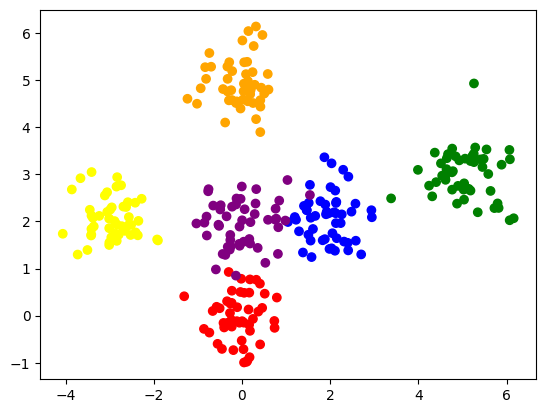

In [18]:
# Generate data from 6 multivariate normal distributions
n = 50
mu = [[0, 0], [2,2], [5,3], [-3, 2], [0,2], [0, 5]]

# Set seed for reproducibility
np.random.seed(SEED)

# Concatenate all data
data = np.concatenate((np.random.randn(n,2)/2 + mu[0], np.random.randn(n,2)/2 + mu[1]))
for i in range(2,6):
    data = np.concatenate((data, np.random.randn(n,2)/2 + mu[i]))

labels = np.repeat([i for i in range(6)], n)

colors = np.array(['red', 'blue', 'green', 'yellow', 'purple', 'orange'])
plt.scatter(data[:,0], data[:,1], c=colors[labels])

In [19]:
# Append labels to satisfy the format-requirement of the class KNN
data = np.append(data, np.reshape(labels, (labels.shape[0],1)), axis=1)

# Create a model
# Use KNeighborsClassifier instead of KNN
model = KNeighborsClassifier(n_neighbors=5) # Changed KNN to KNeighborsClassifier
model.fit(data[:, :2], data[:, 2]) # Fit the model with the data and labels

# Generate new points
new_points = np.random.randn(3,2)*3

# Predict labels on new points
predictions = model.predict(new_points)
print(predictions)

[0. 1. 5.]


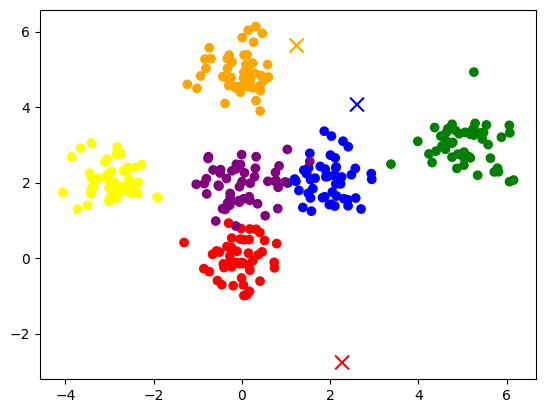

In [20]:
# Plot the predictions together with the data
predicted_col = [colors[int(prediction)] for prediction in predictions]
plt.scatter(data[:,0], data[:,1], c=colors[labels])
plt.scatter(new_points[:,0], new_points[:,1], c=predicted_col, marker='x', s=100)

We see that the classifications (illustrated as crosses) are reasonable and what we would expect from the KNN algorithm.

# Example II
In this example we use the class KNN to predict if cancer is malignant or benign. We perform hyper-parameter optimization using Leave One Out Cross-Validation (LOOCV). Then, we train a final model and test it on test data.

In [21]:
# Load data
all_data = load_breast_cancer()

In [22]:
print(f"We have {len(all_data['feature_names'])} recorded features.")
print(all_data['feature_names'])

We have 30 recorded features.
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [23]:
print(f"We have {np.sum(np.isnan(data))} missing values.")

We have 0 missing values.


# K hyper parameter tunning
To find the best value of k for a K-Nearest Neighbors (KNN) classifier by measuring the cross-validation error using Leave-One-Out Cross-Validation (LOOCV) for every odd 𝑘 from 3 to 19.

Leave-One-Out CV removes one sample from the dataset

Trains the model on the remaining samples

Tests the model on the one left-out sample

Repeats this for every single sample

In [24]:
# Extract features (X) and labels (y)
X = all_data['data']
y = all_data['target']
# Standardize
X_std = (X - np.mean(X,axis=0)) / np.std(X, axis=0)

In [25]:
# Split all data into training data (85%) and test data (15%)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=int(X_std.shape[0]*0.15), random_state=SEED)

In [27]:
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np

cv_error_all_k = []
for k in range(3, 20, 2):
    # We'll calculate the average misclassification rate for each k value.
    cv_error = np.ones(X_train.shape[0])
    for i in range(X_train.shape[0]):
        # Remove the i-th instance from X_train and y_train to form the training data.
        train_features = np.delete(X_train, i, axis=0)
        train_labels = np.delete(y_train, i)
        # Combine features and labels into one training set if needed.
        train_data = np.append(train_features, train_labels.reshape(-1, 1), axis=1)
        
        # Instantiate KNN with the desired k value then fit the model to the training data.
        model = KNN(n_neighbors=k)
        model.fit(train_data[:, :-1], train_data[:, -1].astype(int))
        
        # Predict for the held-out sample and extract the scalar from the prediction array.
        prediction = model.predict(X_train[i, :].reshape(1, -1))
        scalar_prediction = prediction.item()  # Extract the scalar value
        
        # Compare prediction with the true label. This avoids the warning regarding array conversion.
        cv_error[i] = (scalar_prediction != y_train[i])
        
    # Calculate the average error for this value of k.
    cv_error_all_k.append(np.sum(cv_error) / len(cv_error))


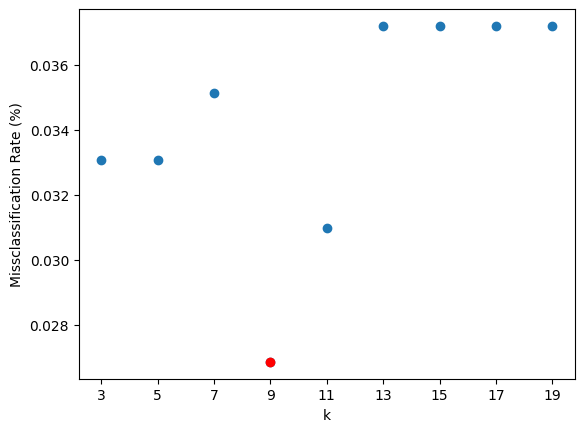

In [29]:
# Plot the missclassification rate for each k
plt.scatter(range(3, 20, 2), cv_error_all_k)
plt.xticks(range(3, 20, 2))
plt.xlabel("k")
plt.ylabel("Missclassification Rate (%)")

# Mark the lowest missclassification as red
plt.scatter(3 + np.argmin(cv_error_all_k)*2, np.min(cv_error_all_k), c='red')

We see that we had the lowest missclassifcation rate with k=9. Now, we train a model with k=13 and test it on the test data. We evaluate the final model using a confusion matrix.

In [39]:
# Now we test our model with k=9 on the test data

# Train final model
# Use n_neighbors instead of k
final_model = KNN(n_neighbors=9) # Changed k to n_neighbors
final_model.fit(X_train, y_train) # Fit the model with training data

# Predict on test data
predictions = final_model.predict(X_test)

# Calculate accuracy
accuracy = np.sum(predictions==y_test)/len(y_test)
print(f"The final model has an accuracy of: {accuracy*100:.2f}%")

The final model has an accuracy of: 95.29%


In [40]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Train the final model with n_neighbors=9
final_model = KNN(n_neighbors=9)
final_model.fit(X_train, y_train)  # Fit the model with training data

# Predict on test data
predictions = final_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"The final model has an accuracy of: {accuracy * 100:.2f}%\n")

# Generate and print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Generate and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


The final model has an accuracy of: 95.29%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.96      0.96      0.96        54

    accuracy                           0.95        85
   macro avg       0.95      0.95      0.95        85
weighted avg       0.95      0.95      0.95        85

Confusion Matrix:
[[29  2]
 [ 2 52]]


In [37]:
# A function for printing a confusion matrix
def print_confusion_matrix(true, predictions):
    print("                   TRUE")
    print("                  0     1")
    print("---------------------------")
   
    print(f"            0|   {sum(y_test[predictions==0]==0)}     {sum(y_test[predictions==0]==1)}")
    print(f"Predicted   1|   {sum(y_test[predictions==1]==0)}     {sum(y_test[predictions==1]==1)}")

In [38]:
print_confusion_matrix(y_test, predictions)

                   TRUE
                  0     1
---------------------------
            0|   29     2
Predicted   1|   2     52


# Load and Explore Dataset
We’ll generate a synthetic dataset using make_blobs for simplicity and visualization.

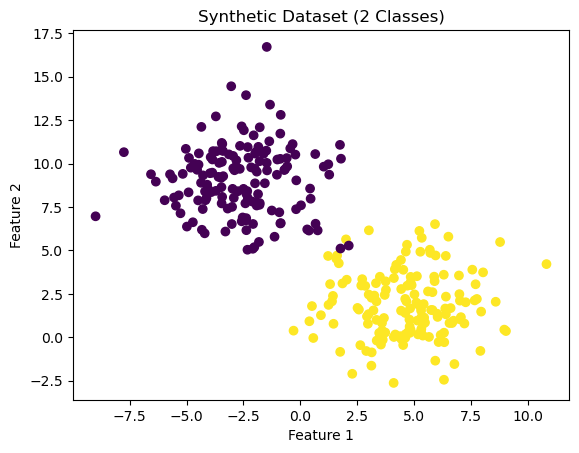

In [20]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=2, n_features=2, random_state=42, cluster_std=2.0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Synthetic Dataset (2 Classes)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Data Preprocessing
Normalize features to ensure equal weighting in distance calculations.


<script type="text/javascript"
  src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_CHTML">
</script>



In [23]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  K-Nearest Neighbors (KNN) — From Scratch

The **K-Nearest Neighbors (KNN)** algorithm is a simple supervised learning method that classifies a new data point based on its proximity to existing labeled data.

---

## 1. Euclidean Distance

To measure how close two points are, we use **Euclidean distance**. For two vectors:

$$
a = (a_1, a_2, \dots, a_n), \quad b = (b_1, b_2, \dots, b_n)
$$

The Euclidean distance between them is:

$$
d(a, b) = \sqrt{ \sum_{i=1}^{n} (a_i - b_i)^2 }
$$

**Example:**

Let \( a = (2, 4) \), \( b = (5, 8) \):

$$
d(a, b) = \sqrt{(2 - 5)^2 + (4 - 8)^2} = \sqrt{9 + 16} = \sqrt{25} = 5
$$

---

## 2. Steps for KNN Classification

To classify a new test point \( x_test} \):

1. Compute the Euclidean distance to all training points.
2. Sort the distances.
3. Select the \( k \) nearest neighbors.
4. Assign the class label that appears most frequently among those \( k \) neighbors.

---

## 3. Predicting the Class (Majority Vote)

If the \( k \) nearest neighbors have labels \( y_1, y_2...., y_k \), the predicted class is:

$$
\text{Predicted Class} = \arg\max \left( \text{bincount}(y_1, y_2,, y_k) \right)
$$

---

## 4. Accuracy of the Model

After making predictions, we evaluate the model's performance using accuracy:

$$
\text{Accuracy} = \frac{ \text{Number of Correct Predictions} }{ \text{Total Predictions} }
$$

---



#  K-Nearest Neighbors (KNN) — Step-by-Step Hand Example

This is a small example to help you manually compute KNN predictions using Euclidean distance.

---

##  Training Data

We have 4 training points in 2D with two possible class labels: **0** and **1**.

| Point | x₁ | x₂ | Class |
|-------|----|----|--------|
| A     | 1  | 2  | 0      |
| B     | 2  | 3  | 0      |
| C     | 3  | 3  | 1      |
| D     | 6  | 5  | 1      |

---

##  Test Point

We want to classify:

- Test point: \( x_{\text{test}} = (3, 4) \)
- Use \( k = 3 \)

---

## Step 1: Compute Euclidean Distances

Euclidean distance formula:

$$
d(a, b) = \sqrt{(x_1^{(a)} - x_1^{(b)})^2 + (x_2^{(a)} - x_2^{(b)})^2}
$$

---

### Distance to A (1, 2):

$$
d = \sqrt{(3 - 1)^2 + (4 - 2)^2} = \sqrt{4 + 4} = \sqrt{8} \approx 2.83
$$

---

### Distance to B (2, 3):

$$
d = \sqrt{(3 - 2)^2 + (4 - 3)^2} = \sqrt{1 + 1} = \sqrt{2} \approx 1.41
$$

---

### Distance to C (3, 3):

$$
d = \sqrt{(3 - 3)^2 + (4 - 3)^2} = \sqrt{0 + 1} = \sqrt{1} = 1.00
$$

---

### Distance to D (6, 5):

$$
d = \sqrt{(3 - 6)^2 + (4 - 5)^2} = \sqrt{9 + 1} = \sqrt{10} \approx 3.16
$$

---

## Step 2: Sort by Distance

| Point | Class | Distance |
|-------|--------|----------|
| C     | 1      | 1.00     |
| B     | 0      | 1.41     |
| A     | 0      | 2.83     |
| D     | 1      | 3.16     |

---

##  Step 3: Pick \( k = 3 \) Nearest Neighbors

- C → Class 1  
- B → Class 0  
- A → Class 0  

---

##  Step 4: Majority Vote

- Class 0: 2 votes  
- Class 1: 1 vote

---

##  Final Prediction

Since the majority of the 3 nearest neighbors are **Class 0**, we predict:

$$
\boxed{\text{Class } 0}
$$

---

##  Challenge: Try it Yourself

Try changing:
- The value of \( k \)
- The test point (e.g., (5, 4) \))

And see how the prediction changes!


In [25]:
import numpy as np
from sklearn.metrics import accuracy_score

# ----------------------------
# Function to calculate Euclidean distance between two vectors
# ----------------------------
def euclidean_distance(a, b):
    # Subtract the vectors, square the differences, sum them, then take the square root
    return np.sqrt(np.sum((a - b)**2))

# ----------------------------
# K-Nearest Neighbors prediction function
# ----------------------------
def knn_predict(X_train, y_train, x_test, k=3):
    # Step 1: Compute the distance from the test point to every point in the training set
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]

    # Step 2: Sort the distances and get the indices of the k nearest neighbors
    k_indices = np.argsort(distances)[:k]

    # Step 3: Get the labels of the k nearest neighbors
    k_labels = y_train[k_indices]

    # Step 4: Return the most common label (majority vote)
    return np.bincount(k_labels).argmax()

# ----------------------------
# Evaluate KNN on the test set
# ----------------------------

# Predict the label for each point in X_test using KNN
y_pred_scratch = [knn_predict(X_train, y_train, x, k=5) for x in X_test]

# Compute the classification accuracy
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)

# Print the accuracy result
print(f"From-Scratch KNN Accuracy: {accuracy_scratch:.2f}")


From-Scratch KNN Accuracy: 0.98


# Compare with Scikit-Learn’s KNN

In [27]:
# Train scikit-learn's KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_sklearn = knn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-Learn KNN Accuracy: {accuracy_sklearn:.2f}")

Scikit-Learn KNN Accuracy: 0.98


# Visualize Decision Boundaries
Visualize how KNN classifies regions in the feature space.

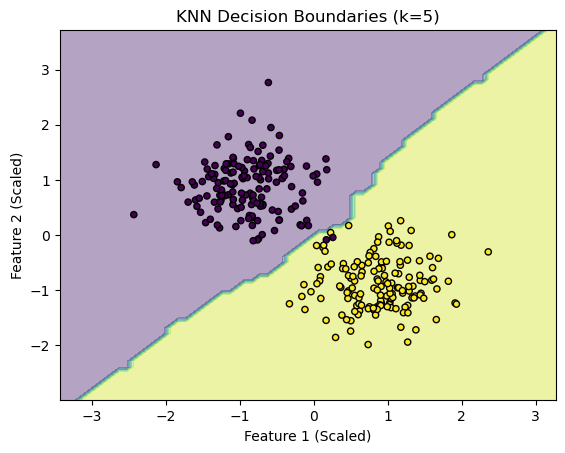

In [29]:
# Create a mesh grid
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for each mesh point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=20, edgecolor='k', cmap='viridis')
plt.title("KNN Decision Boundaries (k=5)")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()

# Prototyping

prototy[ing KNN with K-Means involves clustering the data first using K-Means to identify representative centroids, which are then used as a reduced training set for KNN, improving speed and offering insights into the structure of the data.

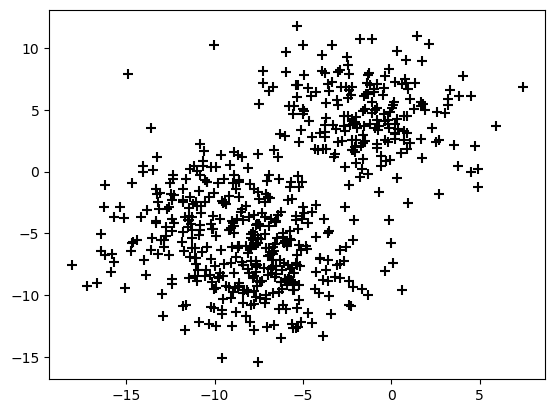

In [284]:
x, y = datasets.make_blobs(n_samples=600, n_features=2, cluster_std=3, random_state=1)

plt.scatter(x[:,0], x[:,1], c='k', marker='+', s=50)
plt.show()

In [234]:

from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, stratify=y)

knn = KNeighborsClassifier()

knn.fit(xTrain, yTrain)


KNeighborsClassifier()

In [236]:
#normal KNN

from sklearn import metrics
from sklearn import model_selection

knnPred = knn.predict(xTest) #Shape => (200,1) [2]
knnProb = knn.predict_proba(xTest) #Shape => (200, 3) [0.1, 0.4, 0.5]

print("Accuracy: ", metrics.balanced_accuracy_score(yTest, knnPred))
print("F1: ", metrics.f1_score(yTest, knnPred, average='weighted'))
print("Loss: ", metrics.log_loss(yTest, knnProb))
print("Cross validation: ", model_selection.cross_val_score(knn, x, y))

print(metrics.classification_report(yTest, knnPred))

Accuracy:  0.8388888888888889
F1:  0.8398164382968591
Loss:  1.2517642564212825
Cross validation:  [0.88333333 0.78333333 0.875      0.85833333 0.825     ]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.74      0.82      0.78        60
           2       0.79      0.73      0.76        60

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180



C:\Users\Jiyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


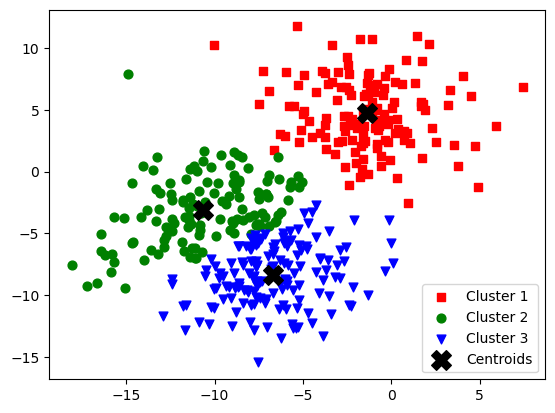

In [262]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)#, init='k-means++')#, n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(xTrain)

plt.scatter(xTrain[y_km==0, 0], xTrain[y_km==0, 1], s=40, c='r', marker='s', label='Cluster 1')
plt.scatter(xTrain[y_km==1, 0], xTrain[y_km==1, 1], s=40, c='g', marker='o', label='Cluster 2')
plt.scatter(xTrain[y_km==2, 0], xTrain[y_km==2, 1], s=40, c='b', marker='v', label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='k', marker='X', label='Centroids')

plt.legend(scatterpoints=1)

In [264]:
centroids = knn.predict(km.cluster_centers_)

print(km.cluster_centers_, centroids)

[[ -1.39858976   4.72160968]
 [-10.63189841  -3.07575854]
 [ -6.67080172  -8.39634677]] [0 1 2]


In [266]:
# KNN with Kmeans centroids


knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(km.cluster_centers_, centroids)



KNeighborsClassifier(n_neighbors=1)

In [268]:
knnPred = knn.predict(xTest) #Shape => (200,1) [2]
knnProb = knn.predict_proba(xTest) #Shape => (200, 3) [0.1, 0.4, 0.5]

print("Accuracy: ", metrics.balanced_accuracy_score(yTest, knnPred))
print("F1: ", metrics.f1_score(yTest, knnPred, average='weighted'))
print("Loss: ", metrics.log_loss(yTest, knnProb))
print("Cross validation: ", model_selection.cross_val_score(knn, x, y))

print(metrics.classification_report(yTest, knnPred))

Accuracy:  0.8722222222222222
F1:  0.8730636048842721
Loss:  4.605577933053858
Cross validation:  [0.8        0.76666667 0.8        0.78333333 0.84166667]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.83      0.80      0.81        60
           2       0.80      0.85      0.82        60

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



#  Weighted K-Nearest Neighbors (Weighted KNN)

**Weighted KNN** is a variation of the standard K-Nearest Neighbors algorithm where **closer neighbors contribute more heavily** to the prediction than farther ones.

---

##  Motivation

In standard KNN, each of the \(k\) neighbors has **equal influence**, regardless of how close or far they are:

- A neighbor at distance \(0.5\) counts the same as one at distance \(3.0\)
- This can be problematic when neighbors are not equally relevant

**Weighted KNN** solves this by giving more weight to **closer** neighbors.

---

##  Formula for Weighted KNN

Let:
- \( x \) be the test point
- \( x_i \) be one of the \(k\) nearest neighbors
- \( d_i = \text{distance}(x, x_i) \)

Then the **weight** assigned to neighbor \(i\) is:

$$
w_i = \frac{1}{d_i}
$$

The class prediction is based on the **weighted sum of votes**:

- For classification: choose the class with the highest total weight
- For regression: compute the weighted average

---

##  Example

Suppose the three nearest neighbors to a test point have:

- Distances: \( d = [0.5, 0.7, 1.5] \)
- Classes: \( [1, 0, 0] \)

### Uniform KNN (standard):
Each neighbor gets **equal weight**, so:
- Class 0: 2 votes
- Class 1: 1 vote → Predict **Class 0**

### Weighted KNN (inverse distance):

Compute weights:

$$
w_1 = \frac{1}{0.5} = 2.0 \quad (\text{Class 1}) \\
w_2 = \frac{1}{0.7} \approx 1.43 \quad (\text{Class 0}) \\
w_3 = \frac{1}{1.5} \approx 0.67 \quad (\text{Class 0})
$$

- Class 1 total weight: \(2.0\)
- Class 0 total weight: \(1.43 + 0.67 = 2.1\)

→ Predict **Class 0** (but it's much closer than before)

---



In [276]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions


In [304]:

x, y = datasets.make_blobs(n_samples=1500, n_features=2, cluster_std=3, random_state=1)


# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)


In [306]:
# Standard KNN (equal weights)
knn_standard = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_standard.fit(X_train, y_train)

# Weighted KNN (closer neighbors get more weight)
knn_weighted = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_weighted.fit(X_train, y_train)


KNeighborsClassifier(weights='distance')

In [308]:
# Predictions
y_pred_standard = knn_standard.predict(X_test)
y_pred_weighted = knn_weighted.predict(X_test)

# Accuracy
acc_standard = accuracy_score(y_test, y_pred_standard)
acc_weighted = accuracy_score(y_test, y_pred_weighted)

print(f"Standard KNN Accuracy: {acc_standard:.2f}")
print(f"Weighted KNN Accuracy: {acc_weighted:.2f}")


Standard KNN Accuracy: 0.82
Weighted KNN Accuracy: 0.80


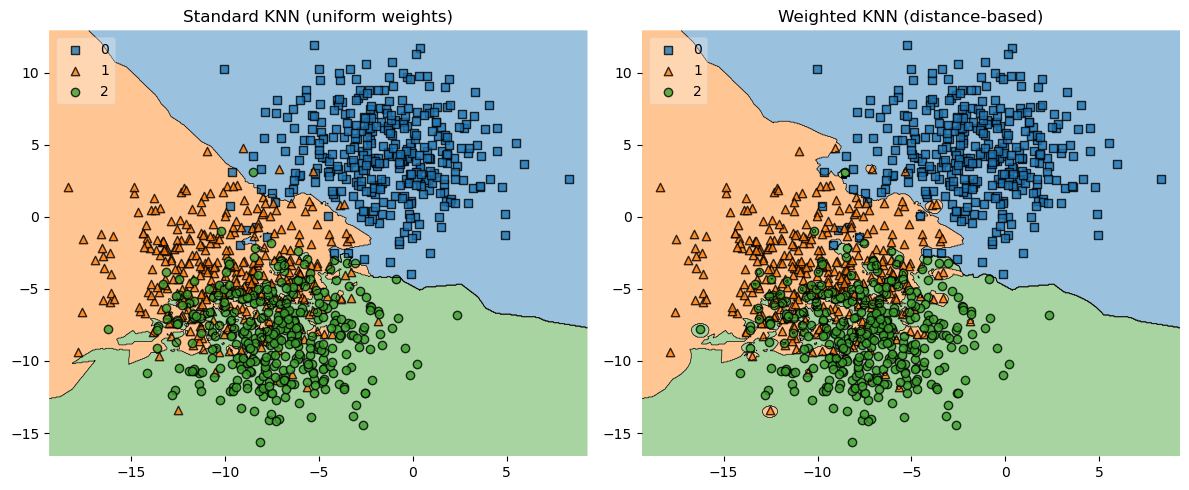

In [310]:
# Standard KNN
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_regions(X_train, y_train, clf=knn_standard, legend=2)
plt.title('Standard KNN (uniform weights)')

# Weighted KNN
plt.subplot(1, 2, 2)
plot_decision_regions(X_train, y_train, clf=knn_weighted, legend=2)
plt.title('Weighted KNN (distance-based)')

plt.tight_layout()
plt.show()


In [312]:
print(metrics.classification_report(y_test, y_pred_weighted))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       150
           1       0.70      0.71      0.71       150
           2       0.74      0.71      0.72       150

    accuracy                           0.80       450
   macro avg       0.80      0.80      0.80       450
weighted avg       0.80      0.80      0.80       450



In [314]:
print(metrics.classification_report(y_test, y_pred_standard))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       150
           1       0.74      0.77      0.75       150
           2       0.78      0.72      0.75       150

    accuracy                           0.82       450
   macro avg       0.82      0.82      0.82       450
weighted avg       0.82      0.82      0.82       450

